In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('heart_disease_processed.csv',index_col=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   fbs       293 non-null    int64  
 4   restecg   293 non-null    int64  
 5   exang     293 non-null    int64  
 6   slope     293 non-null    int64  
 7   thal      293 non-null    int64  
 8   trestbps  293 non-null    float64
 9   chol      293 non-null    float64
 10  thalch    293 non-null    float64
 11  oldpeak   293 non-null    float64
 12  ca        293 non-null    float64
 13  num       293 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 34.3 KB


In [4]:
convert_dt = {'trestbps': int,
                'chol': int,
                'thalch': int,
                'ca': int
                }
 
dataset = dataset.astype(convert_dt)
dataset

,age,sex,cp,fbs,restecg,exang,slope,thal,trestbps,chol,thalch,oldpeak,ca,num
0,63,0,3,1,1,0,2,1,145,233,150,2.3,0,0
1,67,0,0,0,1,1,0,0,160,286,108,1.5,3,1
2,67,0,0,0,1,1,0,2,120,229,129,2.6,2,1
3,37,0,1,0,0,0,2,0,130,250,187,3.5,0,0
4,41,1,2,0,1,0,1,0,130,204,172,1.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,0,0,1,0,0,0,2,144,193,141,3.4,2,1
289,57,0,0,0,0,1,0,2,130,131,115,1.2,1,1
290,57,1,2,0,1,0,0,0,130,236,174,0.0,1,1
291,47,0,0,0,0,1,0,2,150,226,98,1.5,0,1


In [5]:
dataset=dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope',
                'ca','num']]

In [6]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num
0,63,0,3,145,233,1,1,150,0,2.3,2,0,0
1,67,0,0,160,286,0,1,108,1,1.5,0,3,1
2,67,0,0,120,229,0,1,129,1,2.6,0,2,1
3,37,0,1,130,250,0,0,187,0,3.5,2,0,0
4,41,1,2,130,204,0,1,172,0,1.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,0,0,144,193,1,0,141,0,3.4,0,2,1
289,57,0,0,130,131,0,0,115,1,1.2,0,1,1
290,57,1,2,130,236,0,1,174,0,0.0,0,1,1
291,47,0,0,150,226,0,0,98,1,1.5,0,0,1


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=4,max_iter= 1000,penalty= 'l2', solver= 'lbfgs',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=4, max_iter=1000, random_state=0)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29  3]
 [ 8 19]]


0.8135593220338984

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.86      0.70      0.78        27

    accuracy                           0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.82      0.81      0.81        59



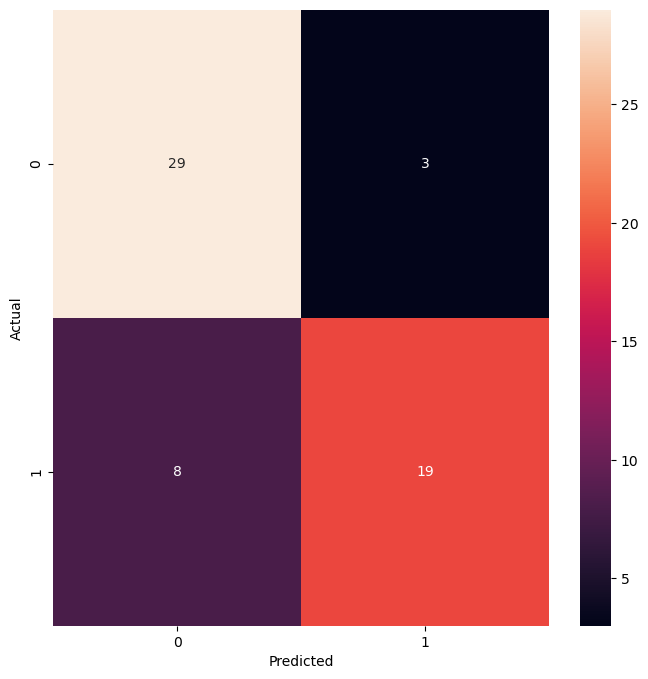

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

In [12]:
y_pred = classifier.predict([[68,0,0,144,193,1,0,141,0,3.4,0,2]])
y_pred

array([1], dtype=int64)

In [14]:
joblib.dump(classifier,'coronary_heart_disease')

['coronary_heart_disease']